In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [153]:
Train_data=pd.read_excel("Train_agriculture.xlsx")

In [154]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [155]:
Test_data=pd.read_excel("Test_agriculture.xlsx")

In [156]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [157]:
Train_data.shape

(4599, 10)

In [158]:
Train_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [159]:
Train_data.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [160]:
Train_data['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [161]:
Train_data['Number_Weeks_Used'].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [162]:
Train_data.duplicated().sum()

0

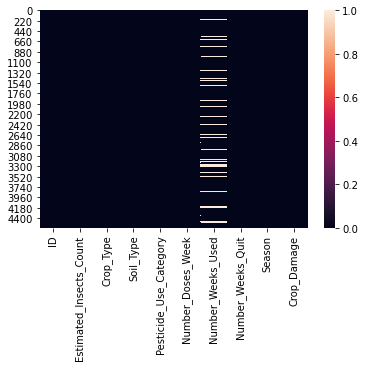

In [163]:
sns.heatmap(Train_data.isna())

In [164]:
Train_data["Number_Weeks_Used"].fillna(Train_data["Number_Weeks_Used"].mode()[0], inplace=True)

In [165]:
Train_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

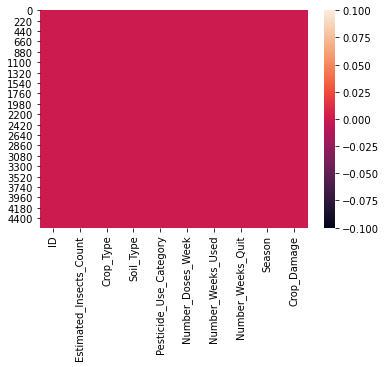

In [166]:
sns.heatmap(Train_data.isnull())

In [167]:
Train_data.shape

(4599, 10)

In [168]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


# Summary Statistics

In [169]:
Train_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [170]:
Train_data['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [171]:
Train_data['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [172]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [173]:
#Changing the categorical variables into Numeric variables

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    Train_data[column]=le.fit_transform(Train_data[column])
        

In [174]:
Train_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,4,1,0,0,0,0.0,0,0,0
1,1,5,1,0,0,0,0.0,0,1,1
2,2,9,1,0,0,0,0.0,0,1,1
3,3,9,1,1,0,0,0.0,0,1,1
4,4,13,1,0,0,0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
4594,4594,49,0,1,1,4,20.0,1,0,1
4595,4595,50,0,1,1,6,47.0,2,0,1
4596,4596,51,0,1,1,2,7.0,27,1,0
4597,4597,51,0,1,1,2,20.0,24,1,0


In [175]:
Train_data['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [176]:
Train_data.shape

(4599, 10)

# Test Data

In [177]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [178]:
Test_data.shape

(1199, 9)

In [179]:
#Preprocessing

Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [180]:
Test_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

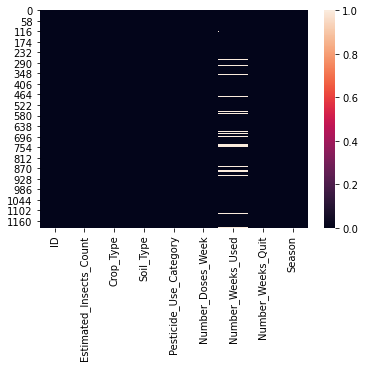

In [181]:
sns.heatmap(Test_data.isnull())

In [182]:
Test_data["Number_Weeks_Used"].fillna(Test_data["Number_Weeks_Used"].mode()[0], inplace=True)

In [183]:
Test_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

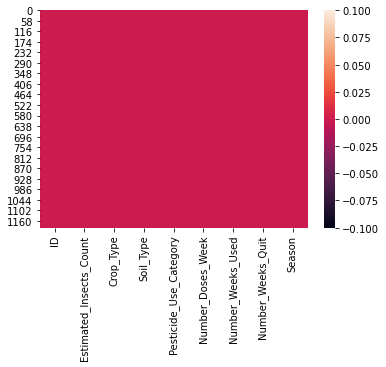

In [184]:
sns.heatmap(Test_data.isnull())

In [185]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in Test_data.columns:
    if Test_data[column].dtype==np.number:
        continue
    Test_data[column]=le.fit_transform(Test_data[column])

In [186]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,3,1,1,0,0,20.0,0,1
1,1,14,1,1,0,0,0.0,0,1
2,2,22,1,0,0,0,0.0,0,1
3,3,24,1,0,0,0,0.0,0,1
4,4,26,0,0,0,0,0.0,0,0


In [187]:
Test_data.shape

(1199, 9)

# To check the correlation

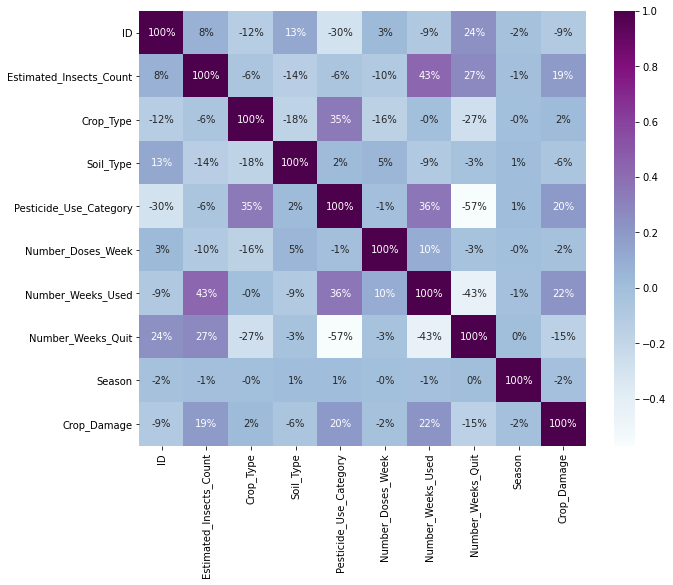

In [188]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(), annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with Target Variable')

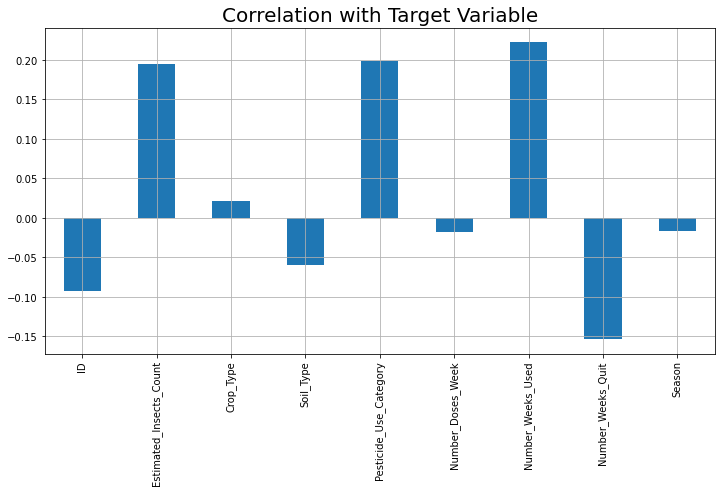

In [189]:
#Correlation with Target Column

plt.figure(figsize=(12,6))
Train_data.drop('Crop_Damage', axis=1).corrwith(Train_data['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable", fontsize=20)

In [190]:
#Observation:
#Number_Weeks_Quit,Soil_Type and Number_Doses_Week are negatively corelated with Crop Damage
#Estimated_Insects_Count,Pesticide_Use_Category and Number_Weeks_Used are positively correlated with Crop Damage

In [191]:
#Removing Outliers

from scipy.stats import zscore
z=np.abs(zscore(Train_data))

In [192]:
z

array([[1.73167423, 2.27658289, 1.85681868, ..., 0.94800186, 1.28702725,
        0.42765624],
       [1.730921  , 2.20486758, 1.85681868, ..., 0.94800186, 0.15207762,
        1.77233374],
       [1.73016778, 1.91800634, 1.85681868, ..., 0.94800186, 0.15207762,
        1.77233374],
       ...,
       [1.73016778, 1.09403659, 0.53855555, ..., 1.8327185 , 0.15207762,
        0.42765624],
       [1.730921  , 1.09403659, 0.53855555, ..., 1.52374957, 0.15207762,
        0.42765624],
       [1.73167423, 1.09403659, 0.53855555, ..., 0.80282207, 0.15207762,
        0.42765624]])

In [193]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,  100,  103,  112,  149,  165,  166,  167,  179,
        185,  186,  197,  207,  222,  223,  242,  248,  252,  264,  265,
        290,  296,  305,  316,  325,  346,  351,  355,  361,  374,  375,
        377,  453,  458,  466,  480,  510,  517,  522,  557,  595,  612,
        634,  693,  807,  819,  855,  856,  911,  944,  978,  980,  998,
       1017, 1019, 1067, 1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327,
       1329, 1337, 1339, 1340, 1347, 1406, 1443, 1457, 1489, 1523, 1589,
       1652, 1654, 1737, 1807, 1868, 2019, 2043, 2090, 2136, 2139, 2140,
       2165, 2170, 2171, 2174, 2183, 2185, 2188, 2190, 2237, 2392, 2553,
       2565, 2585, 2590, 2615, 2663, 2671, 2696, 2702, 2710, 2714, 2716,
       2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814, 2828, 2829,
       2834, 2841, 2842, 2851, 2860, 2861, 2870, 2884, 2888, 2912, 2915,
       2917, 2921, 2923, 2928, 2929, 2940, 2942, 3015, 3045, 3048, 3058,
       3086, 3107, 3126, 3183, 3189, 3206, 3241, 3

In [194]:
z[4570][8]

0.15207761800895064

In [195]:
Train_new=Train_data[(z<3).all(axis=1)]

In [196]:
#Checking the shape

print(Train_data.shape,'\t\t',Train_new.shape)

(4599, 10) 		 (4406, 10)


In [197]:
Train_data=Train_new
Train_data.shape

(4406, 10)

In [198]:
Train_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [199]:
Train_data['Crop_Damage'].unique()

array([0, 1], dtype=int64)

In [200]:
Train_data['Crop_Damage'].value_counts()

0    3754
1     652
Name: Crop_Damage, dtype: int64

In [201]:
#Splitting the data into input and Output variables
x=Train_data.drop(columns=['Crop_Damage'],axis=1)
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,4,1,0,0,0,0.0,0,0
1,1,5,1,0,0,0,0.0,0,1
2,2,9,1,0,0,0,0.0,0,1
3,3,9,1,1,0,0,0.0,0,1
4,4,13,1,0,0,0,0.0,0,1


In [202]:
y=Train_data['Crop_Damage']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [203]:
print(x.shape,'\t\t', y.shape)

(4406, 9) 		 (4406,)


In [205]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [206]:
#Splitting the data into training and Testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [207]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(3524, 9) 		 (882, 9)


In [208]:
#Checking the shape

print(y_train.shape,'\t\t',y_test.shape)

(3524,) 		 (882,)


In [210]:
#Need to import all the Model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [211]:
#All algorithms by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),
      RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("*******************************************")
    print('\n')

Accuracy score of LogisticRegression() is:
0.8503401360544217
[[746   5]
 [127   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       751
           1       0.44      0.03      0.06       131

    accuracy                           0.85       882
   macro avg       0.65      0.51      0.49       882
weighted avg       0.79      0.85      0.79       882

*******************************************


Accuracy score of GaussianNB() is:
0.8469387755102041
[[703  48]
 [ 87  44]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       751
           1       0.48      0.34      0.39       131

    accuracy                           0.85       882
   macro avg       0.68      0.64      0.65       882
weighted avg       0.83      0.85      0.84       882

*******************************************


Accuracy score of SVC() is:
0.8571428571428571
[[750   1]
 [125   6]]
              precisio

In [213]:
#Cross Validate the models

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),
      RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print("********************************************")
    print('\n')



Model: LogisticRegression()
Score: [0.57823129 0.69727891 0.88095238 0.84693878 0.85714286 0.85034014
 0.85034014 0.85034014 0.85034014 0.7755102  0.8537415  0.85324232
 0.86348123 0.85324232 0.85324232]
Mean Score: 0.8209576435807544
Standard deviation: 0.07802777212270522
********************************************


Model: GaussianNB()
Score: [0.46258503 0.3707483  0.97619048 0.80952381 0.90816327 0.86394558
 0.85034014 0.85034014 0.82993197 0.62244898 0.79591837 0.86348123
 0.8668942  0.86348123 0.85324232]
Mean Score: 0.7858156687020655
Standard deviation: 0.16225177681095165
********************************************


Model: SVC()
Score: [0.26190476 0.19727891 0.8537415  0.3707483  0.85034014 0.85034014
 0.63605442 0.85034014 0.76870748 0.30272109 0.70748299 0.85324232
 0.67576792 0.85324232 0.85324232]
Mean Score: 0.6590103162994437
Standard deviation: 0.23903086578581154
********************************************


Model: DecisionTreeClassifier()
Score: [0.19387755 0.1496

In [214]:
#From above models Logistic Regression gives best score

# We will use Gridsearch cv  to find the best parameter nad check the score 

In [216]:
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [218]:
#Logistic Regression with best parameters

lr=LogisticRegression(C=1,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8503401360544217
[[746   5]
 [127   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       751
           1       0.44      0.03      0.06       131

    accuracy                           0.85       882
   macro avg       0.65      0.51      0.49       882
weighted avg       0.79      0.85      0.79       882



In [219]:
#Cross validate Logistic Regression

score=cross_val_score(lr,x,y,cv=5, scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('std:',score.std())

[0.7324263  0.85357548 0.85244041 0.83768445 0.85130533]
Mean: 0.8254863958447549
std: 0.04688519261765795


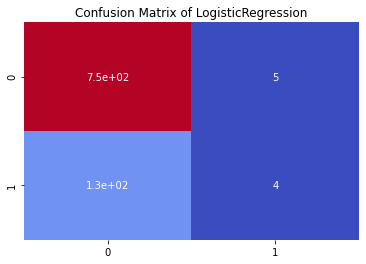

In [220]:
#Plotting confusion Matrix for LogisticRegression

cm=confusion_matrix(y_test,predlr)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of LogisticRegression")
plt.show()